In [69]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt
import matplotlib


# from analysis_plot_kit.core import fig_generator
from psPlotKit.data_plotter.fig_generator import figureGenerator

In [70]:

plt.rcParams["font.family"] = "Arial"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['font.size'] = 12

In [71]:
# read in data
data_property_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_sea.csv')
data_property_nacl = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_nacl.csv')
data_property_simple = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_simple.csv')
data_property_reatoro_RO = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_RO_reaktoro.csv')
data_property_reatoro_MVC = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_MVC_reaktoro.csv')
# Feed TDS,Temperature,Enthalpy,Vap Pressure,Osmotic Pressure,Density

In [72]:
data_property_seawater = data_property_seawater[data_property_seawater["# Feed TDS"]< .2]
data_property_nacl = data_property_nacl[data_property_nacl["# Feed TDS"]< .2]
data_property_simple= data_property_simple[data_property_simple["# Feed TDS"]< .2]
data_property_reatoro_RO = data_property_reatoro_RO[data_property_reatoro_RO["# Feed Mass Frac"]< .2]
data_property_reatoro_MVC = data_property_reatoro_MVC[data_property_reatoro_MVC["# Feed Mass Frac"]< .2]

In [73]:
# find errors and create dataframe
results_col = ["Osmotic Pressure", "Density"] 
error_sea = pd.DataFrame()
error_nacl = pd.DataFrame()
error_simple = pd.DataFrame()

for i in results_col:
    error_sea[i] = pd.DataFrame((data_property_reatoro_RO[i] - data_property_seawater[i]) / data_property_reatoro_RO[i]) * 100
    error_nacl[i] = pd.DataFrame((data_property_reatoro_RO[i] - data_property_nacl[i]) / data_property_reatoro_RO[i]) * 100
    error_simple[i] = pd.DataFrame((data_property_reatoro_RO[i] - data_property_simple[i]) / data_property_reatoro_RO[i]) * 100

results_col_2 = ["Enthalpy","Vap Pressure"]  

for i in results_col_2:
    if i == "Enthalpy":
        error_sea[i] = pd.DataFrame((abs(data_property_reatoro_MVC[i]) - (data_property_seawater[i])) / abs(data_property_reatoro_MVC[i])) * 100
        error_nacl[i] = pd.DataFrame((abs(data_property_reatoro_MVC[i]) - (data_property_nacl[i])) / abs(data_property_reatoro_MVC[i])) * 100
        error_simple[i] = pd.DataFrame((abs(data_property_reatoro_MVC[i]) - (data_property_simple[i])) / abs(data_property_reatoro_MVC[i])) * 100
    else:
        error_sea[i] = pd.DataFrame(abs(data_property_reatoro_MVC[i] - data_property_seawater[i]) / data_property_reatoro_MVC[i]) * 100
        error_nacl[i] = pd.DataFrame(abs(data_property_reatoro_MVC[i] - data_property_nacl[i]) / data_property_reatoro_MVC[i]) * 100
        error_simple[i] = pd.DataFrame(abs(data_property_reatoro_MVC[i] - data_property_simple[i]) / data_property_reatoro_MVC[i]) * 100

col = ["Density","Osmotic Pressure", "Vap Pressure","Enthalpy",] 

In [74]:
# NaCl errors
for i in col:
    print(i)
    print(min(error_sea[i]))
    print(max(error_sea[i]))

Density
0.06962172197725396
1.539306251704335
Osmotic Pressure
-4.465629762880472
0.11382917635534323
Vap Pressure
0.0700149426975981
2.1659867781550894
Enthalpy
0.6029834700068994
11.667864264667736


In [75]:
# NaCl errors
for i in col:
    print(i)
    print(min(error_nacl[i]))
    print(max(error_nacl[i]))

Density
0.30720601643508727
2.0626611956181344
Osmotic Pressure
-10.52781139779227
-6.777187167268378
Vap Pressure
0.2023811004556517
6.458446437528497
Enthalpy
-2.625328185294169
-0.0941330202366438


In [76]:
# NaCl errors
for i in col:
    print(i)
    print(min(error_simple[i]))
    print(max(error_simple[i]))

Density
-1.1285644405876303
11.18098207188123
Osmotic Pressure
-25.371600195608572
-2.4129438682951077
Vap Pressure
12.54313730844844
642.4686169767778
Enthalpy
-23.670453904278
-3.9124968319360756


In [77]:
# xticks = ([3.361113e-02,4.838276e-02,9.373868e-02,1.366460e-01,1.775197e-01]) # actual input varied in parameter sweep
x_plot = data_property_reatoro_MVC["# Feed Mass Frac"]*1000 #np.repeat([35, 70.0, 100.0, 125, 150.0, 200.0, 250], 8) #kg/m3 Reaktoro @ 25 C
xticks = ([35, 70, 100, 125, 150])
yticks = np.linspace(
    min(data_property_nacl["Temperature"])- 273.15, max(data_property_nacl["Temperature"])- 273.15, 8
)
xticks = xticks
yticks = np.around(yticks, decimals=0)

(40,)
[ 35.  70. 100. 125. 150.] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 25.79482 35.0 25.0
[0] [1] 26.60537 35.0 35.0
[0] [2] 27.35522 35.0 45.0
[0] [3] 28.0488 35.0 55.0
[0] [4] 28.68911 35.0 65.0
[0] [5] 29.27808 35.0 75.0
[0] [6] 29.81675 35.0 85.0
[0] [7] 30.30542 35.0 95.0
[1] [0] 55.24833 70.0 25.0
[1] [1] 57.08554 70.0 35.0
[1] [2] 58.75473 70.0 45.0
[1] [3] 60.27092 70.0 55.0
[1] [4] 61.6448 70.0 65.0
[1] [5] 62.88362 70.0 75.0
[1] [6] 63.99194 70.0 85.0
[1] [7] 64.97211 70.0 95.0
[2] [0] 84.80744 100.0 25.0
[2] [1] 87.69959 100.0 35.0
[2] [2] 90.29613 100.0 45.0
[2] [3] 92.62607 100.0 55.0
[2] [4] 94.71024 100.0 65.0
[2] [5] 96.56306 100.0 75.0
[2] [6] 98.19383 100.0 85.0
[2] [7] 99.60783 100.0 95.0
[3] [0] 113.3264 125.0 25.0
[3] [1] 117.2088 125.0 35.0
[3] [2] 120.6652 125.0 45.0
[3] [3] 123.7397 125.0 55.0
[3] [4] 126.4642 125.0 65.0
[3] [5] 128.8607 125.0 75.0
[3] [6] 130.9435 125.0 85.0
[3] [7] 132.7209 125.0 95.0
[4] [0] 146.1388 150.0 25.0
[4] [1] 151.0893 150.0 35.0

C:\Users\sss0031\AppData\Local\Temp\2\ipykernel_12948\3019565418.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
C:\Users\sss0031\AppData\Local\Temp\2\ipykernel_12948\3019565418.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


(40,)
[ 35.  70. 100. 125. 150.] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 1024.394 35.0 25.0
[0] [1] 1020.987 35.0 35.0
[0] [2] 1016.924 35.0 45.0
[0] [3] 1012.279 35.0 55.0
[0] [4] 1007.108 35.0 65.0
[0] [5] 1001.456 35.0 75.0
[0] [6] 995.3571 35.0 85.0
[0] [7] 988.8403 35.0 95.0
[1] [0] 1053.29 70.0 25.0
[1] [1] 1049.449 70.0 35.0
[1] [2] 1045.124 70.0 45.0
[1] [3] 1040.347 70.0 55.0
[1] [4] 1035.152 70.0 65.0
[1] [5] 1029.57 70.0 75.0
[1] [6] 1023.628 70.0 85.0
[1] [7] 1017.351 70.0 95.0
[2] [0] 1079.388 100.0 25.0
[2] [1] 1075.14 100.0 35.0
[2] [2] 1070.571 100.0 45.0
[2] [3] 1065.675 100.0 55.0
[2] [4] 1060.464 100.0 65.0
[2] [5] 1054.956 100.0 75.0
[2] [6] 1049.171 100.0 85.0
[2] [7] 1043.131 100.0 95.0
[3] [0] 1102.146 125.0 25.0
[3] [1] 1097.532 125.0 35.0
[3] [2] 1092.744 125.0 45.0
[3] [3] 1087.745 125.0 55.0
[3] [4] 1082.524 125.0 65.0
[3] [5] 1077.088 125.0 75.0
[3] [6] 1071.451 125.0 85.0
[3] [7] 1065.634 125.0 95.0
[4] [0] 1125.885 150.0 25.0
[4] [1] 1120.877 150.0 35.0


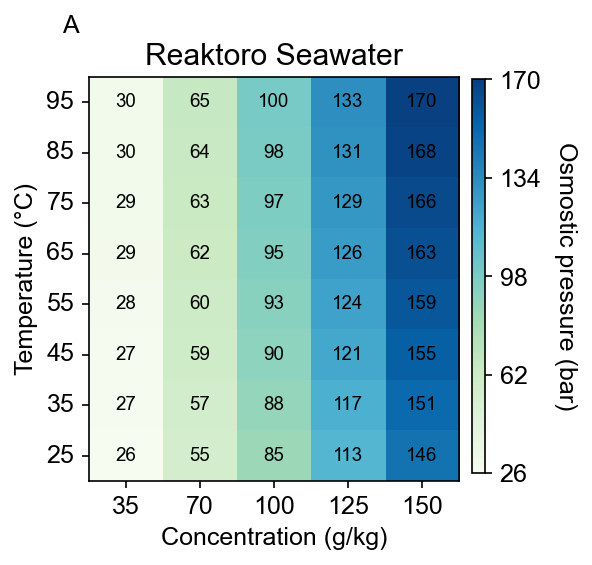

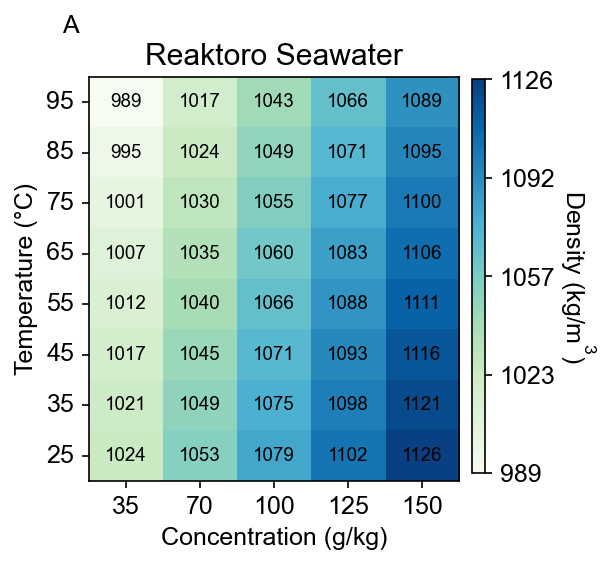

In [78]:
vmin = np.min(data_property_reatoro_RO["Osmotic Pressure"])/1e5
vmax = np.max(data_property_reatoro_RO["Osmotic Pressure"])/1e5

zticks = np.linspace(vmin, vmax, 5)
zticks = np.around(zticks, decimals=3)
figure = figureGenerator()

figure.init_figure(width=3.5, height=3.5)
figure.set_default_figure_settings(font_size=12, label_size=12)
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.add_text(-0.75, 8.5, "A")
figure.set_title("Reaktoro Seawater")
figure.plot_map(
    xdata=x_plot,
    ydata=data_property_reatoro_RO["Temperature"] - 273.15,
    zdata=data_property_reatoro_RO["Osmotic Pressure"]/1e5,
    text=True,
    textfontsize= 9,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=0, zlabel="Osmostic pressure (bar)")
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Concentration (g/kg)",
    ylabel="Temperature (°C)",
    fontsize=12
)

figure.save_fig(name="plot_reaktoro_osm_p")

vmin = np.min(data_property_reatoro_RO["Density"])
vmax = np.max(data_property_reatoro_RO["Density"])

zticks = np.linspace(vmin, vmax, 5)
zticks = np.around(zticks, decimals=3)
figure = figureGenerator()
figure.init_figure(width=3.5, height=3.5)
figure.set_default_figure_settings(font_size=12, label_size=12)
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.add_text(-0.75, 8.5, "A")
figure.set_title("Reaktoro Seawater")
figure.plot_map(
    xdata=x_plot,
    ydata=data_property_reatoro_RO["Temperature"] - 273.15,
    zdata=data_property_reatoro_RO["Density"],
    text=True,
    textfontsize= 9,
    sig_figs_text= 0,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=0, zlabel="Density (kg/m$^{3}$)", zlabelpad=20)
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Concentration (g/kg)",
    ylabel="Temperature (°C)",
    fontsize=12
)

figure.save_fig(name="plot_reaktoro_dens")

C:\Users\sss0031\AppData\Local\Temp\2\ipykernel_12948\1455191344.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


(40,)
[ 35.  70. 100. 125. 150.] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 3.071118 35.0 25.0
[0] [1] 5.453082 35.0 35.0
[0] [2] 9.29185 35.0 45.0
[0] [3] 15.25379 35.0 55.0
[0] [4] 24.208299999999998 35.0 65.0
[0] [5] 37.254709999999996 35.0 75.0
[0] [6] 55.74391000000001 35.0 85.0
[0] [7] 81.29274000000001 35.0 95.0
[1] [0] 3.010736 70.0 25.0
[1] [1] 5.34584 70.0 35.0
[1] [2] 9.109591 70.0 45.0
[1] [3] 14.95605 70.0 55.0
[1] [4] 23.73895 70.0 65.0
[1] [5] 36.5384 70.0 75.0
[1] [6] 54.6824 70.0 85.0
[1] [7] 79.76142 70.0 95.0
[2] [0] 2.9554630000000004 100.0 25.0
[2] [1] 5.247772 100.0 35.0
[2] [2] 8.943197 100.0 45.0
[2] [3] 14.68477 100.0 55.0
[2] [4] 23.31227 100.0 65.0
[2] [5] 35.888709999999996 100.0 75.0
[2] [6] 53.72189 100.0 85.0
[2] [7] 78.37907000000001 100.0 95.0
[3] [0] 2.907106 125.0 25.0
[3] [1] 5.1621120000000005 125.0 35.0
[3] [2] 8.798088 125.0 45.0
[3] [3] 14.448559999999999 125.0 55.0
[3] [4] 22.94126 125.0 65.0
[3] [5] 35.324510000000004 125.0 75.0
[3] [6] 52.88870

C:\Users\sss0031\AppData\Local\Temp\2\ipykernel_12948\1455191344.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


(40,)
[ 35.  70. 100. 125. 150.] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 99.56326 35.0 25.0
[0] [1] 139.6273 35.0 35.0
[0] [2] 179.789 35.0 45.0
[0] [3] 220.0408 35.0 55.0
[0] [4] 260.3899 35.0 65.0
[0] [5] 300.85990000000004 35.0 75.0
[0] [6] 341.4895 35.0 85.0
[0] [7] 382.3313 35.0 95.0
[1] [0] 94.76921 70.0 25.0
[1] [1] 133.20929999999998 70.0 35.0
[1] [2] 171.7571 70.0 45.0
[1] [3] 210.36829999999998 70.0 55.0
[1] [4] 249.027 70.0 65.0
[1] [5] 287.7389 70.0 75.0
[1] [6] 326.5268 70.0 85.0
[1] [7] 365.42659999999995 70.0 95.0
[2] [0] 90.80998 100.0 25.0
[2] [1] 127.9016 100.0 35.0
[2] [2] 165.11020000000002 100.0 45.0
[2] [3] 202.36260000000001 100.0 55.0
[2] [4] 239.6251 100.0 65.0
[2] [5] 276.8894 100.0 75.0
[2] [6] 314.16540000000003 100.0 85.0
[2] [7] 351.476 100.0 95.0
[3] [0] 87.62353999999999 125.0 25.0
[3] [1] 123.6227 125.0 35.0
[3] [2] 159.746 125.0 45.0
[3] [3] 195.898 125.0 55.0
[3] [4] 232.0313 125.0 65.0
[3] [5] 268.1267 125.0 75.0
[3] [6] 304.1843 125.0 85.0
[3] [7]

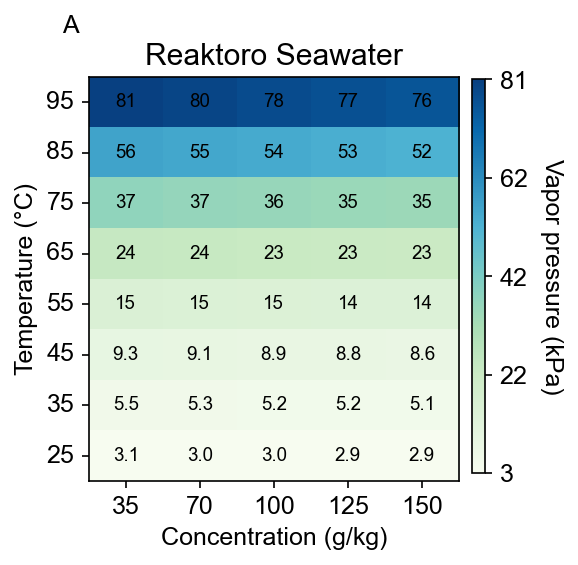

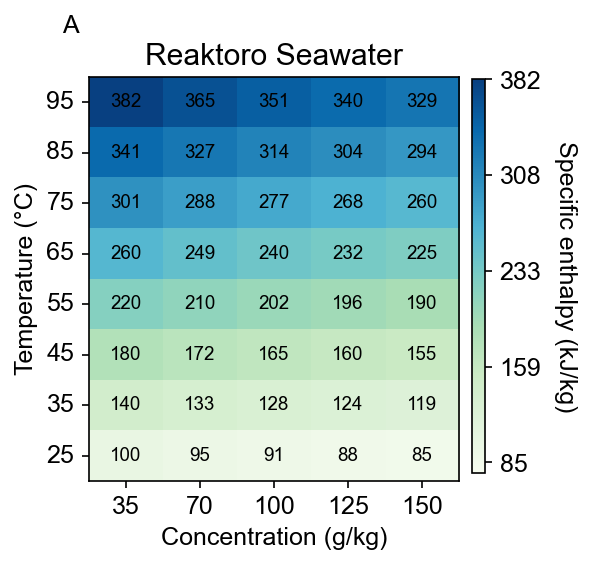

In [79]:

vmin = np.min(data_property_reatoro_MVC["Vap Pressure"])/1000
vmax = np.max(data_property_reatoro_MVC["Vap Pressure"])/1000

zticks = np.linspace(vmin, vmax, 5)
zticks = np.around(zticks, decimals=3)
figure = figureGenerator()
figure.init_figure(width=3.5, height=3.5)
figure.set_default_figure_settings(font_size=12, label_size=12)
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.add_text(-0.75, 8.5, "A")
figure.set_title("Reaktoro Seawater")
figure.plot_map(
    xdata=x_plot,
    ydata=data_property_reatoro_MVC["Temperature"] - 273.15,
    zdata=data_property_reatoro_MVC["Vap Pressure"]/1000,
    text=True,
    textfontsize= 9,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=0, zlabel="Vapor pressure (kPa)")
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Concentration (g/kg)",
    ylabel="Temperature (°C)",
    fontsize=12
)

figure.save_fig(name="plot_reaktoro_vap_p")

vmin = abs(np.min(data_property_reatoro_MVC["Enthalpy"]))/1000
vmax = abs(np.max(data_property_reatoro_MVC["Enthalpy"]))/1000
# vmin = abs(vmin-ref)
# vmax = abs(vmax-ref)

zticks = np.linspace(vmin, vmax, 5)
zticks = np.around(zticks, decimals=3)
figure = figureGenerator()
figure.init_figure(width=3.5, height=3.5)
figure.set_default_figure_settings(font_size=12, label_size=12)
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.add_text(-0.75, 8.5, "A")
figure.set_title("Reaktoro Seawater")
figure.plot_map(
    xdata=x_plot,
    ydata=data_property_reatoro_MVC["Temperature"] - 273.15,
    zdata=abs(data_property_reatoro_MVC["Enthalpy"])/1000,
    text=True,
    textfontsize= 9,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=0, zlabel="Specific enthalpy (kJ/kg)")
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Concentration (g/kg)",
    ylabel="Temperature (°C)",
    fontsize=12
)

figure.save_fig(name="plot_reaktoro_enthalpy")

In [80]:
import matplotlib.colors as mcolors
error_map = mcolors.LinearSegmentedColormap.from_list('Random gradient 8360', (
    # Edit this gradient at https://eltos.github.io/gradient/#Random%20gradient%208360=FED976-FFEDA0-D9F0A3-ADDD8E-78C679-41AB5D-238443-006837-004529-006837-238443-41AB5D-78C679-ADDD8E-D9F0A3-FFEDA0-FED976
    (0.000, (0.996, 0.851, 0.463)),
    (0.063, (1.000, 0.929, 0.627)),
    (0.125, (0.851, 0.941, 0.639)),
    (0.188, (0.678, 0.867, 0.557)),
    (0.250, (0.471, 0.776, 0.475)),
    (0.313, (0.255, 0.671, 0.365)),
    (0.375, (0.137, 0.518, 0.263)),
    (0.438, (0.000, 0.408, 0.216)),
    (0.500, (0.000, 0.271, 0.161)),
    (0.563, (0.000, 0.408, 0.216)),
    (0.625, (0.137, 0.518, 0.263)),
    (0.688, (0.255, 0.671, 0.365)),
    (0.750, (0.471, 0.776, 0.475)),
    (0.813, (0.678, 0.867, 0.557)),
    (0.875, (0.851, 0.941, 0.639)),
    (0.938, (1.000, 0.929, 0.627)),
    (1.000, (0.996, 0.851, 0.463))))

In [81]:
def colormap_prop_error(data, error_data, xticks, yticks, z_format=0, i = "Osmotic Pressure", title = "prop_name", letter = "A", file_name="file"):

    vmin = -10
    vmax = 10

    zticks = np.linspace(vmin, vmax, 5)
    zticks = np.around(zticks, decimals=3)
    figure = figureGenerator()
    figure.init_figure(width=3.5, height=3.5)
    figure.set_default_figure_settings(font_size=12, label_size=12)
    figure.colorMaps["color_map"] = matplotlib.colormaps.get_cmap(error_map)
    figure.add_text(-0.75, 8.5, letter)
    figure.set_title(title)
    figure.plot_map(
        xdata=x_plot,
        ydata=data["Temperature"] - 273.15,
        zdata=error_data[i],
        text=True,
        sig_figs_text= 0,
        textfontsize= 9,
        text_color="black",
        build_map=True,
        vmin=vmin,
        vmax=vmax,
    )
    figure.set_axis_ticklabels(
        xticklabels=xticks,
        yticklabels=yticks,
        xformat=1,
        yformat=0,
        xlabel="Concentration (g/kg)",
        ylabel="Temperature (°C)",
        fontsize=12
    )
    figure.add_colorbar(zticks=zticks, zformat=z_format, zlabel= "% Difference")


    figure.save_fig(name=file_name)

(40,)
[ 35.  70. 100. 125. 150.] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] -0.3406885568497861 35.0 25.0
[0] [1] -0.4017985842707694 35.0 35.0
[0] [2] -0.48063952693489576 35.0 45.0
[0] [3] -0.5551752659650324 35.0 55.0
[0] [4] -0.6118698000739654 35.0 65.0
[0] [5] -0.6430749557348023 35.0 75.0
[0] [6] -0.6456102693955579 35.0 85.0
[0] [7] -0.619559141566096 35.0 95.0
[1] [0] 0.09314308685891502 70.0 25.0
[1] [1] 0.11382917635534323 70.0 35.0
[1] [2] 0.06312683251203775 70.0 45.0
[1] [3] -0.021038338223474937 70.0 55.0
[1] [4] -0.11360244497508305 70.0 65.0
[1] [5] -0.19860497853018003 70.0 75.0
[1] [6] -0.2665804474751039 70.0 85.0
[1] [7] -0.31288809921672545 70.0 95.0
[2] [0] 0.04889901169048376 100.0 25.0
[2] [1] -0.0006499460259734395 100.0 35.0
[2] [2] -0.14175579839357458 100.0 45.0
[2] [3] -0.3264091848007802 100.0 55.0
[2] [4] -0.5223194450779557 100.0 65.0
[2] [5] -0.7082729151292431 100.0 75.0
[2] [6] -0.8709304851435167 100.0 85.0
[2] [7] -1.0027022976005 100.0 95.0
[3] [0]

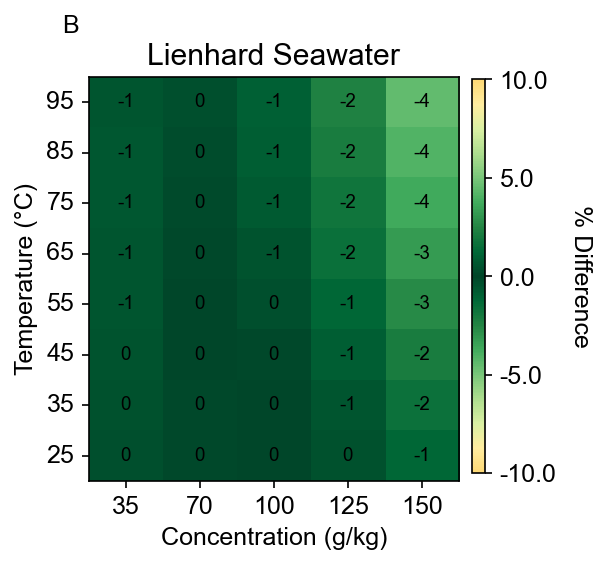

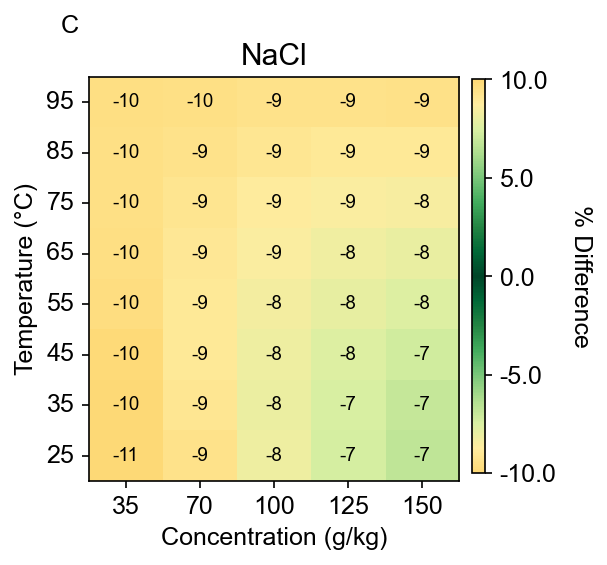

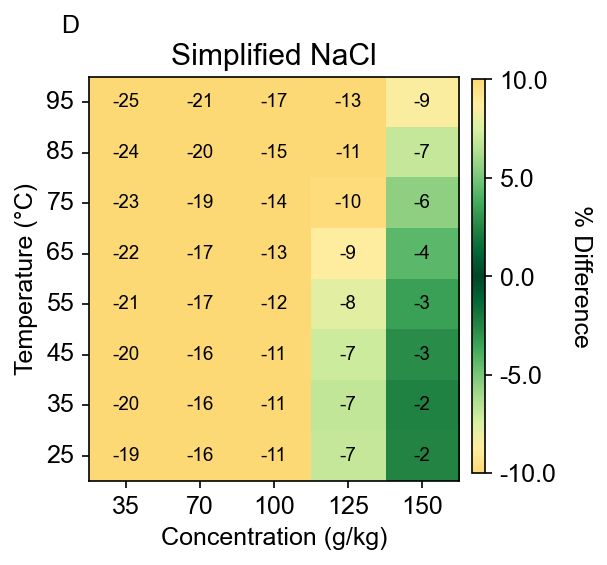

In [82]:
colormap_prop_error(data_property_seawater, error_sea, xticks, yticks, 1, "Osmotic Pressure", "Lienhard Seawater", "B", "plot_sea_Osm_P")
colormap_prop_error(data_property_nacl, error_nacl, xticks, yticks, 1, "Osmotic Pressure", "NaCl", "C","plot_nacl_Osm_P")
colormap_prop_error(data_property_simple, error_simple, xticks, yticks, 1, "Osmotic Pressure", "Simplified NaCl", "D", "plot_simple_Osm_P")

(40,)
[ 35.  70. 100. 125. 150.] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 0.6029834700068994 35.0 25.0
[0] [1] 1.0608956844399258 35.0 35.0
[0] [2] 1.4525360283443371 35.0 45.0
[0] [3] 1.819889765897961 35.0 55.0
[0] [4] 2.18457013885715 35.0 65.0
[0] [5] 2.561856864274712 35.0 75.0
[0] [6] 2.964044282474285 35.0 85.0
[0] [7] 3.4014217512403544 35.0 95.0
[1] [0] 2.0344793419719465 70.0 25.0
[1] [1] 2.558755282101164 70.0 35.0
[1] [2] 3.075214940168409 70.0 45.0
[1] [3] 3.5983083002524543 70.0 55.0
[1] [4] 4.144891919350108 70.0 65.0
[1] [5] 4.72998263356119 70.0 75.0
[1] [6] 5.366420152955283 70.0 85.0
[1] [7] 6.0646652433074015 70.0 95.0
[2] [0] 3.7991969605102907 100.0 25.0
[2] [1] 4.082904357725005 100.0 35.0
[2] [2] 4.551263338061492 100.0 45.0
[2] [3] 5.118781830239382 100.0 55.0
[2] [4] 5.7693037999775525 100.0 65.0
[2] [5] 6.504113194654621 100.0 75.0
[2] [6] 7.329323980298279 100.0 85.0
[2] [7] 8.25177252500882 100.0 95.0
[3] [0] 5.521975030910631 125.0 25.0
[3] [1] 5.44544003

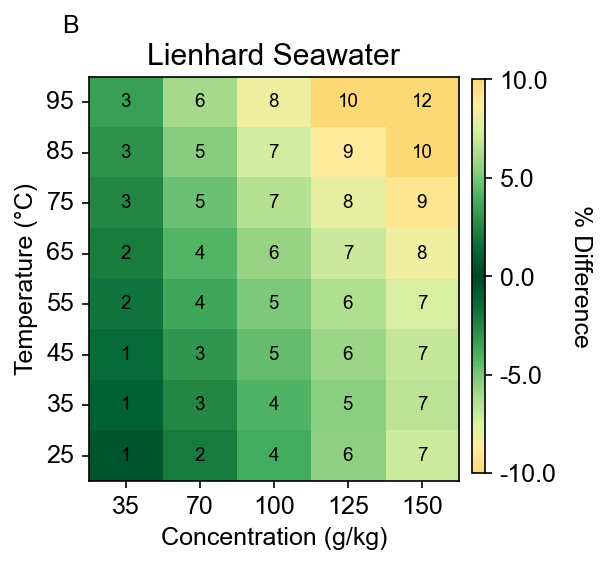

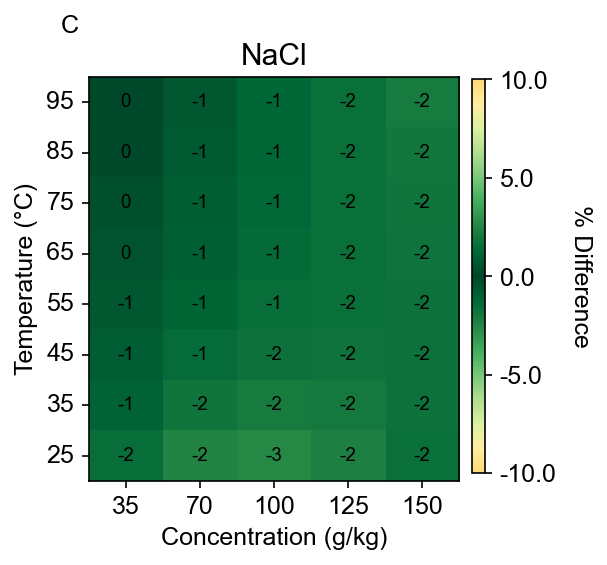

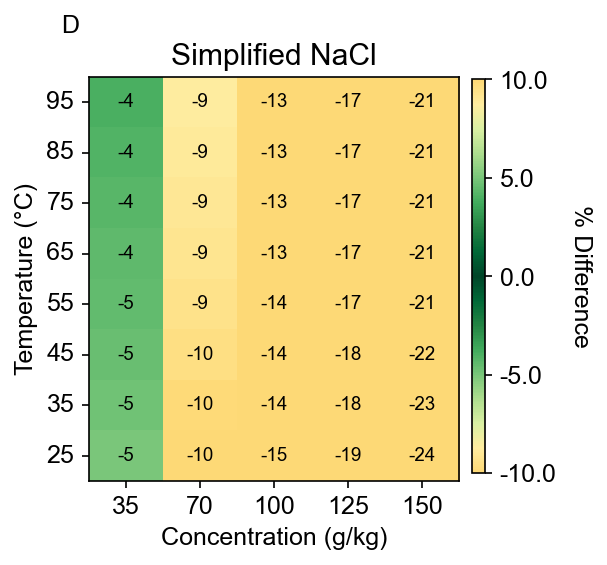

In [83]:
colormap_prop_error(data_property_seawater, error_sea, xticks, yticks, 2, "Enthalpy", "Lienhard Seawater", "B", "plot_sea_Enthalpy")
colormap_prop_error(data_property_nacl, error_nacl, xticks, yticks, 2, "Enthalpy", "NaCl", "C","plot_nacl_Enthalpy")
colormap_prop_error(data_property_simple, error_simple, xticks, yticks, 2, "Enthalpy", "Simplified NaCl", "D", "plot_simple_Enthalpy")

(40,)
[ 35.  70. 100. 125. 150.] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 0.08121874981696434 35.0 25.0
[0] [1] 0.07169533010704063 35.0 35.0
[0] [2] 0.06962172197725396 35.0 45.0
[0] [3] 0.07399145887645833 35.0 55.0
[0] [4] 0.08330784781770592 35.0 65.0
[0] [5] 0.09586042721797426 35.0 75.0
[0] [6] 0.10995048912595796 35.0 85.0
[0] [7] 0.12464095567302012 35.0 95.0
[1] [0] 0.29042334020070154 70.0 25.0
[1] [1] 0.27652606272434804 70.0 35.0
[1] [2] 0.2773833535542303 70.0 45.0
[1] [3] 0.2885575678115045 70.0 55.0
[1] [4] 0.30720126126405234 70.0 65.0
[1] [5] 0.3309148479462228 70.0 75.0
[1] [6] 0.35813791729027084 70.0 85.0
[1] [7] 0.3880666554610925 70.0 95.0
[2] [0] 0.5834787861269537 100.0 25.0
[2] [1] 0.5634615026880213 100.0 35.0
[2] [2] 0.5653058040989255 100.0 45.0
[2] [3] 0.5820723954301241 100.0 55.0
[2] [4] 0.6092616062402886 100.0 65.0
[2] [5] 0.6439131110681292 100.0 75.0
[2] [6] 0.6844451476451445 100.0 85.0
[2] [7] 0.7303013715439542 100.0 95.0
[3] [0] 0.907955933242969

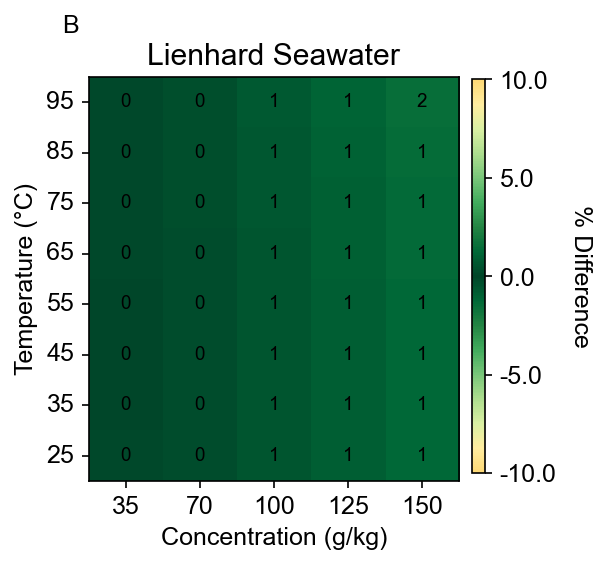

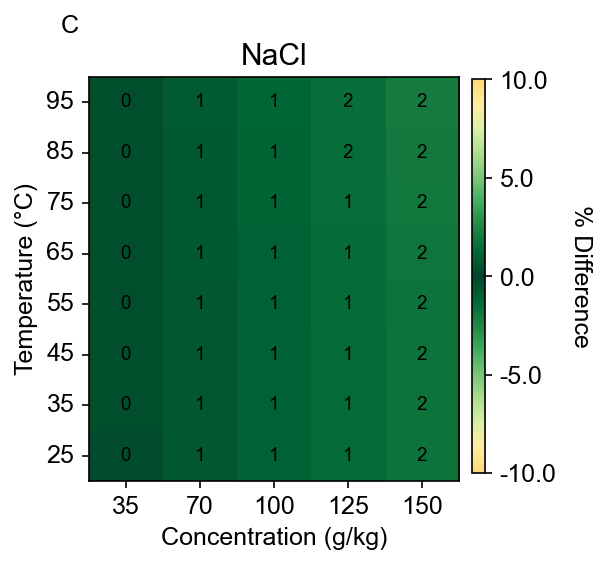

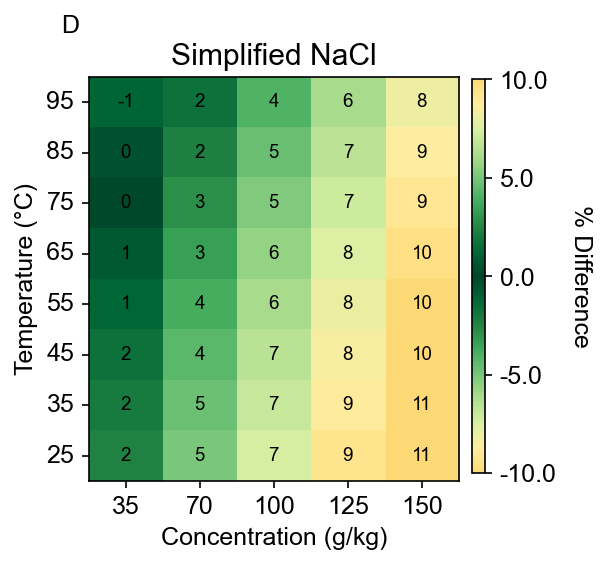

In [84]:
colormap_prop_error(data_property_seawater, error_sea, xticks, yticks, 1, "Density", "Lienhard Seawater","B","plot_sea_dens")
colormap_prop_error(data_property_nacl, error_nacl, xticks, yticks, 1, "Density", "NaCl", "C", "plot_nacl_dens")
colormap_prop_error(data_property_simple, error_simple, xticks, yticks, 1, "Density", "Simplified NaCl", "D","plot_simple_dens")

(40,)
[ 35.  70. 100. 125. 150.] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 1.2985824706181872 35.0 25.0
[0] [1] 1.308544415800088 35.0 35.0
[0] [2] 1.3468254438029073 35.0 45.0
[0] [3] 1.4187949355537097 35.0 55.0
[0] [4] 1.5302189744839676 35.0 65.0
[0] [5] 1.6876255378179061 35.0 75.0
[0] [6] 1.8973373055460123 35.0 85.0
[0] [7] 2.1659867781550894 35.0 95.0
[1] [0] 0.9252554857018341 70.0 25.0
[1] [1] 0.9357182407254975 70.0 35.0
[1] [2] 0.9685725736753732 70.0 45.0
[1] [3] 1.0303522654711663 70.0 55.0
[1] [4] 1.1278931881991412 70.0 65.0
[1] [5] 1.2680631883169535 70.0 75.0
[1] [6] 1.4577999502582115 70.0 85.0
[1] [7] 1.7039942368127405 70.0 95.0
[2] [0] 0.3574397649369947 100.0 25.0
[2] [1] 0.3664221692558341 100.0 35.0
[2] [2] 0.39101229683299094 100.0 45.0
[2] [3] 0.4394348702771568 100.0 55.0
[2] [4] 0.5195118278914947 100.0 65.0
[2] [5] 0.6390867768721712 100.0 75.0
[2] [6] 0.8055189420923166 100.0 85.0
[2] [7] 1.0260264634423293 100.0 95.0
[3] [0] 0.28843117519623357 125.0 25.

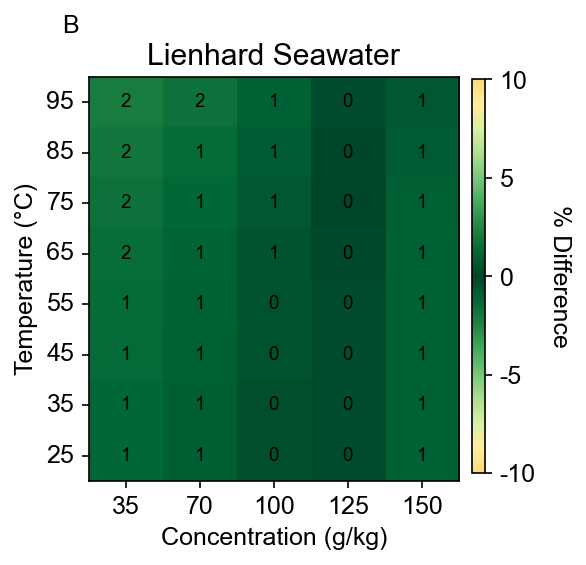

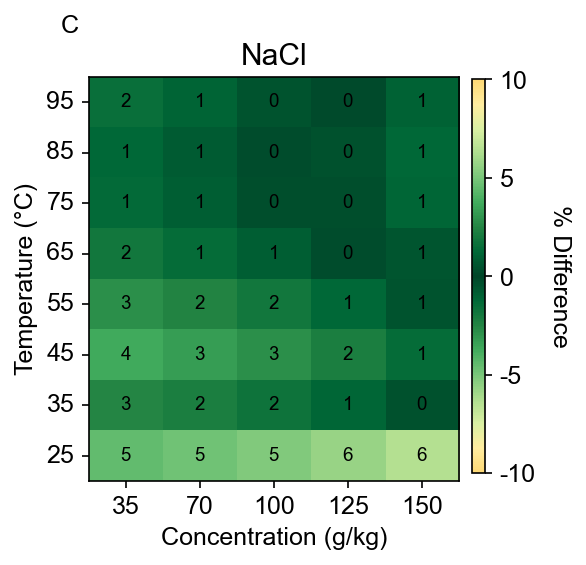

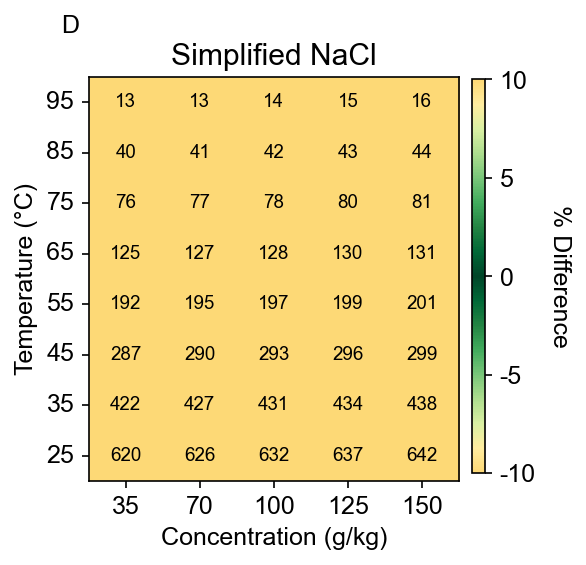

In [85]:
colormap_prop_error(data_property_seawater, error_sea, xticks, yticks, 0, "Vap Pressure", "Lienhard Seawater","B","plot_sea_vap_P")
colormap_prop_error(data_property_nacl, error_nacl, xticks, yticks, 0, "Vap Pressure", "NaCl", "C","plot_nacl_vap_P")
colormap_prop_error(data_property_simple, error_simple, xticks, yticks, 0, "Vap Pressure", "Simplified NaCl", "D", "plot_simple_vap_P")